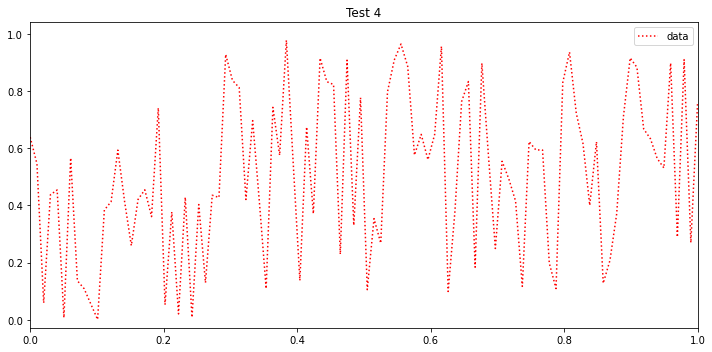

/done


In [3]:
%matplotlib inline

import numpy as np
import cdxbasics.dynaplot as dynaplot
 
x = np.linspace(0,1,100)

fig = dynaplot.figure(col_size=10)
ax = fig.add_subplot()
ax.set_title("Test")
ax.set_xlim()
y = np.random.random(size=(100,1))
l = ax.plot(x,y,":",color="red", label="data")
ax.legend()

fig.render()

import time
for i in range(5):
    time.sleep(1)
    y = np.random.random(size=(100,1))
    ax.set_title("Test %ld" % i)
    l[0].set_ydata( y )
    fig.render()
fig.close()
print("/done")    

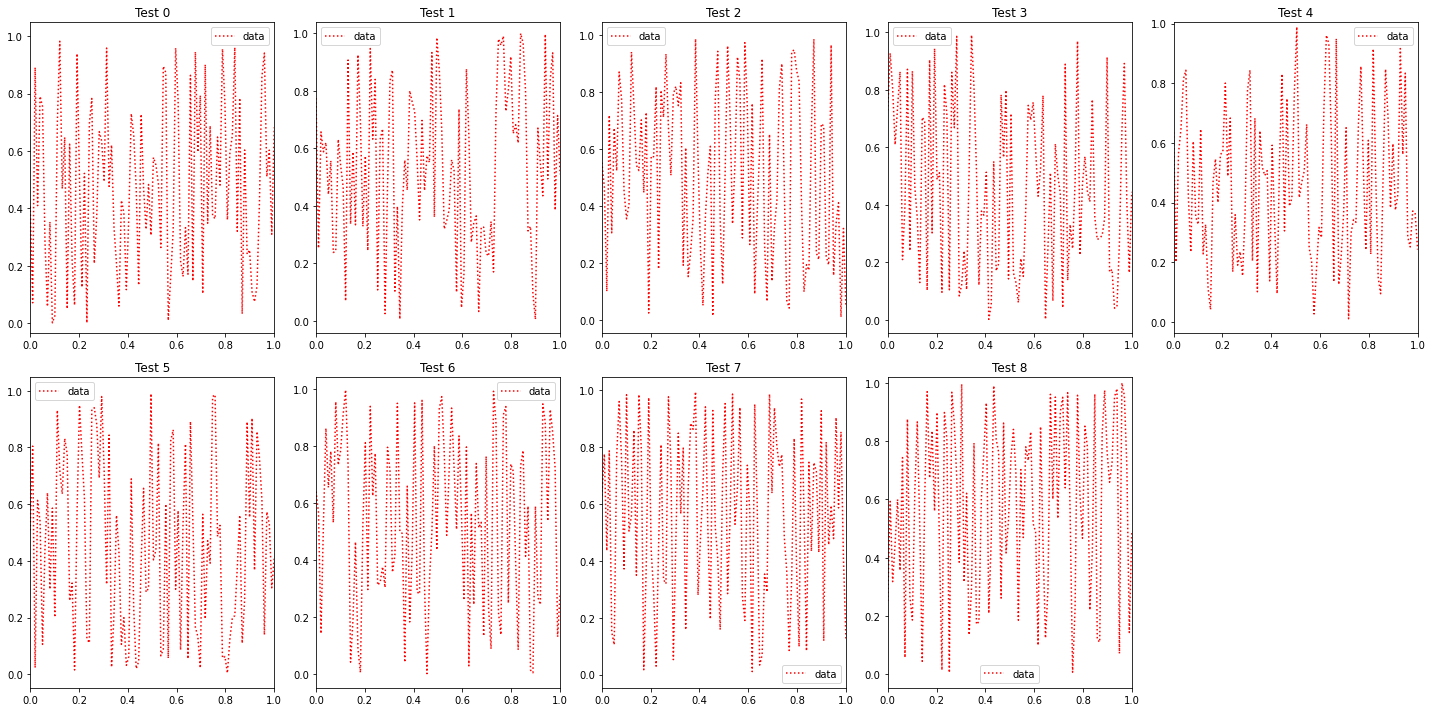

/done


In [4]:
%matplotlib inline

import numpy as np
import cdxbasics.dynaplot as dynaplot
 
x = np.linspace(0,1,100)

fig = dynaplot.figure()
lines = []
for k in range(9):
    ax = fig.add_subplot()
    ax.set_title("Test %ld" % k)
    ax.set_xlim()
    y = np.random.random(size=(100,1))
    l = ax.plot(x,y,":",color="red", label="data")
    lines.append(l)
    ax.legend()

fig.render()

import time
for i in range(5):
    time.sleep(1)
    for l in lines:
        y = np.random.random(size=(100,1))
        l[0].set_ydata( y )
    fig.render()
fig.close()
print("/done")